In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Face/Train', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 122 images belonging to 3 classes.


In [5]:

val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Face/Vali', target_size=(400,300), batch_size=32, class_mode='categorical')

Found 18 images belonging to 3 classes.


In [6]:
# Các nhãn có trong bộ dữ liệu training
dict = list(training_set.class_indices.keys())
training_set.class_indices



{'Lam': 0, 'Nhu': 1, 'Trang': 2}

In [7]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'Lam': 0, 'Nhu': 1, 'Trang': 2}

In [8]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(400,300,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 400, 300, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 400, 300, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 200, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 200, 150, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 150, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 100, 75, 64)      0         
 2D)                                                    

In [9]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [10]:

history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=val_set)

Epoch 1/20
4/4 [==============================] - 143s 35s/step - loss: 4.7638 - accuracy: 0.3852 - val_loss: 1.0886 - val_accuracy: 0.3333
Epoch 2/20
4/4 [==============================] - 113s 28s/step - loss: 1.0141 - accuracy: 0.4262 - val_loss: 1.4210 - val_accuracy: 0.3333
Epoch 3/20
4/4 [==============================] - 112s 29s/step - loss: 0.9434 - accuracy: 0.5984 - val_loss: 0.7451 - val_accuracy: 0.8333
Epoch 4/20
4/4 [==============================] - 112s 29s/step - loss: 0.5114 - accuracy: 0.8443 - val_loss: 0.4894 - val_accuracy: 0.8333
Epoch 5/20
4/4 [==============================] - 114s 30s/step - loss: 0.3490 - accuracy: 0.8934 - val_loss: 0.1378 - val_accuracy: 0.9444
Epoch 6/20
4/4 [==============================] - 117s 28s/step - loss: 0.1133 - accuracy: 0.9672 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 114s 27s/step - loss: 0.0364 - accuracy: 0.9836 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 8/20
4/4 [====

In [11]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.00012952940596733242
Train Accuracy 1.0


<function matplotlib.pyplot.show(*args, **kw)>

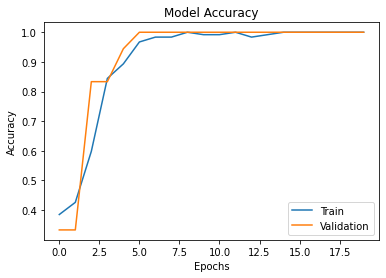

In [12]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [13]:
# Lưu lại
model.save("Face.h5")

In [14]:
# Tải mô hình 
model_face=load_model('Face.h5')

1/1 [==============================] - 1s 1s/step
Nhu


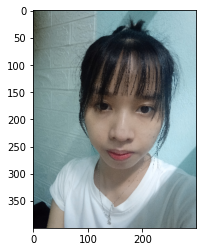

1/1 [==============================] - 1s 816ms/step
Nhu


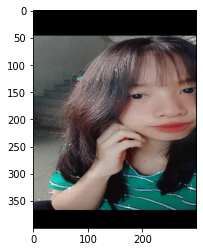

1/1 [==============================] - 1s 715ms/step
Trang


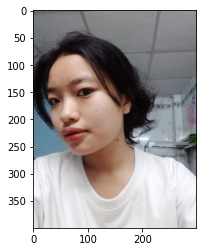

1/1 [==============================] - 1s 616ms/step
Trang


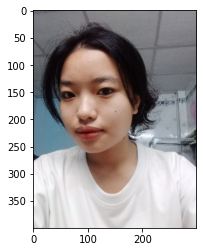

1/1 [==============================] - 1s 606ms/step
Trang


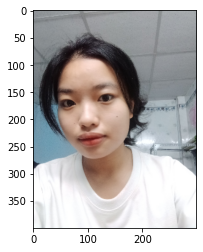

1/1 [==============================] - 1s 772ms/step
Lam


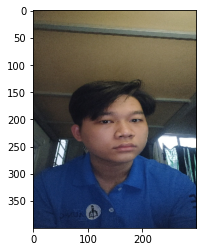

1/1 [==============================] - 0s 443ms/step
Lam


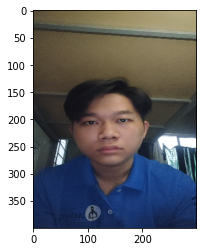

1/1 [==============================] - 1s 577ms/step
Lam


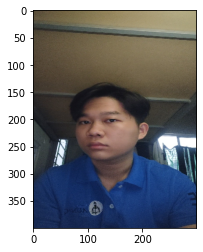

1/1 [==============================] - 1s 1s/step
Nhu


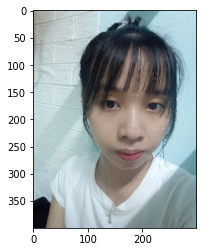

1/1 [==============================] - 1s 943ms/step
Nhu


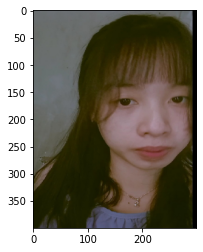

In [15]:
 test="/content/drive/MyDrive/Colab Notebooks/BTVN/Face/Test/Test 1"
import os
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(400,300))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_face.predict(img)
  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()
  

In [ ]:
!jupyter nbconvert --to html "/content/Nhận_diện_khuôn_mặt.ipynb"


[NbConvertApp] Converting notebook /content/Nhận_diện_khuôn_mặt.ipynb to html
[NbConvertApp] Writing 1416913 bytes to /content/Nhận_diện_khuôn_mặt.html
